## Get the data

Import necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


Read needed columns only.

In [3]:
data = pd.read_csv("pp-complete.csv",usecols=[1,2,4,6,11],header=None,names=['Price','Time','PropertyType','EstateType','Location'])
data

,Price,Time,PropertyType,EstateType,Location
0,18500,1995-01-31 00:00,F,L,TORQUAY
1,73450,1995-10-09 00:00,D,F,LIVERPOOL
2,59000,1995-03-31 00:00,D,F,POOLE
3,31000,1995-12-04 00:00,D,F,WOODBRIDGE
4,95000,1995-09-22 00:00,D,F,LICHFIELD
...,...,...,...,...,...
25744775,450000,2020-09-14 00:00,D,F,KNUTSFORD
25744776,232500,2020-08-27 00:00,D,F,NORTHWICH
25744777,190000,2020-07-15 00:00,S,F,WIRRAL
25744778,150000,2020-08-17 00:00,T,F,CREWE


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore the data

In [5]:
data.describe()

,Price
count,2.574478e+07
mean,2.013365e+05
std,8.028588e+05
min,1.000000e+00
25%,8.000000e+04
50%,1.400000e+05
75%,2.300000e+05
max,5.943000e+08


Plot histogram of price paid

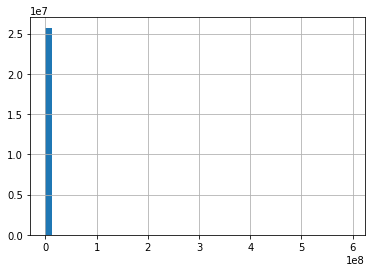

In [6]:
data['Price'].hist(bins = 50)
plt.show()

Replot the histogram with the highest 0.01 portion ignored.

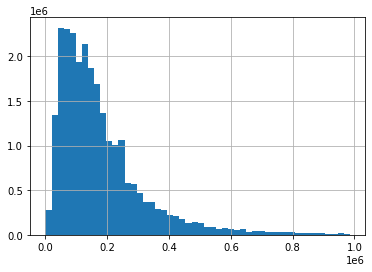

In [7]:
data['Price'].hist(bins = 50, range = (0,np.percentile(data['Price'],99)))
plt.show()

Calculate the median of price paid in each year. Plot a line chart to see the trend of house pricing prior to 2017.

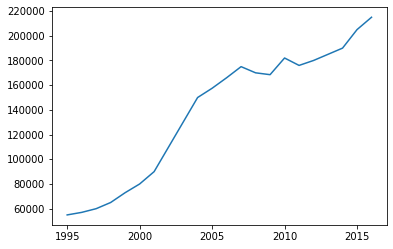

In [8]:
#convert the content in 'Time' column to time value.
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

import datetime as dt
price_median_annual = []
year = []
for i in range(1995, 2017):
  price_median_annual.append(data[data['Time'].dt.year==i]['Price'].median())
  year.append(i)

plt.plot(year, price_median_annual)
plt.show()

We can see from graph above that the median of price paid increases along with year. Thus, we infer that price paid in 2017 would be the most similar to price paid in 2016 and 2015. Therefore, we predict the price paid in 2017 based on than in 2016 and 2015.

## Prepare the data

We only take data of 2015, 2016 and 2017

In [9]:
data = data[data['Time'].dt.year>=2015]
data = data[data['Time'].dt.year<=2017]

Encode non-numerical columns.

In [10]:
def encode_location(row):
    if 'LONDON' in row['Location']:
        return 1
    return 0

def encode_EstateType(row):
    if row['EstateType']=='L':
        return 1
    return 0

data['Location'] = data.apply(encode_location,axis=1)
data['EstateType'] = data.apply(encode_EstateType,axis=1)

one_hot = pd.get_dummies(data['PropertyType'])
data = data.drop("PropertyType", axis = 1)
data = data.join(one_hot)
data.head(50)

data

,Price,Time,EstateType,Location,D,F,O,S,T
20011212,389000,2015-02-20,0,0,1,0,0,0,0
20011213,267995,2015-03-11,0,0,1,0,0,0,0
20011214,165000,2015-07-10,0,0,0,0,0,1,0
20011215,207500,2015-05-14,0,0,0,0,0,0,1
20011216,700000,2015-01-14,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
23129846,430000,2017-01-16,0,0,1,0,0,0,0
23129847,300000,2017-01-27,0,0,0,0,0,0,1
23129848,125000,2017-01-23,1,0,0,1,0,0,0
23129849,390000,2017-02-10,0,0,1,0,0,0,0


Split the data.

We use on data of 2015 and 2016 as test set; data of 2017 as test set.


In [11]:
import datetime as dt
train = data[data['Time'].dt.year < 2017]
test = data[data['Time'].dt.year == 2017]

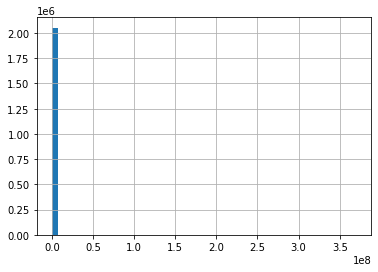

In [12]:
train['Price'].hist(bins = 50)
plt.show()

In [13]:
train['Price'].describe()

count    2.054506e+06
mean     3.053380e+05
std      1.047101e+06
min      1.000000e+00
25%      1.350000e+05
50%      2.100000e+05
75%      3.260000e+05
max      3.700000e+08
Name: Price, dtype: float64

Remove outliers.

In [14]:
# get quartiles
Q1 = train['Price'].quantile(q = 0.25)
Q3 = train['Price'].quantile(q = 0.75)

# calculate lower and upper boundaries based on interquartile range
lower_bound = Q1 - 1.5*(Q3 - Q1)
upper_bound = Q3 + 1.5*(Q3 - Q1)

train = train.drop(train[(train['Price']>upper_bound)|(train['Price']<lower_bound)].index)

In [15]:
train['Price'].describe()

count    1.919840e+06
mean     2.257228e+05
std      1.249136e+05
min      1.000000e+00
25%      1.310000e+05
50%      1.967500e+05
75%      2.950000e+05
max      6.125000e+05
Name: Price, dtype: float64

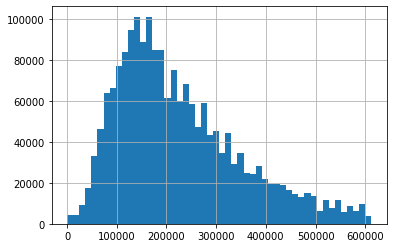

In [16]:
train['Price'].hist(bins = 50)
plt.show()

separate label and features

In [17]:
import datetime as dt
x_train = train.drop(columns=['Price','Time'])
y_train = train.filter(items=['Price'])
x_test = test.drop(columns=['Price','Time'])
y_test = test.filter(items=['Price'])

In [18]:
x_train

,EstateType,Location,D,F,O,S,T
20011212,0,0,1,0,0,0,0
20011213,0,0,1,0,0,0,0
20011214,0,0,0,0,0,1,0
20011215,0,0,0,0,0,0,1
20011217,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
22065712,0,0,0,0,1,0,0
22065713,0,0,0,0,0,0,1
22065714,0,0,0,0,1,0,0
22065715,0,0,0,0,1,0,0


In [19]:
y_train

,Price
20011212,389000
20011213,267995
20011214,165000
20011215,207500
20011217,126000
...,...
22065712,249950
22065713,135000
22065714,210000
22065715,315000


## Explore models

Four methods are used evaluate a model.
1. Root-mean-square-deviation
2. Coefficient of determination (R square). Baseline: 0.0
3. The percentage of predictions that are within the range (0.8 * actual value, 1.2 * actual). Baseline: 0.4/2 = 0.2
4. The percentage of predictions that are within the range (0.5 * actual value, 1.5 * actual). Baseline: 1/2 = 0.5

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluate(model, x, y):
    predictions = model.predict(x)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)

    count = 0
    count2 = 0
    true_value = np.array(y['Price'])
    for i in range(len(y)):
        if 1.2*true_value[i] > predictions[i] > 0.8*true_value[i]:
           count += 1
        if 1.5*true_value[i] > predictions[i] > 0.5*true_value[i]:
           count2 += 1

    print("RMSE: ", np.sqrt(mse),"\n", "RMSE/Mean: ", rmse/true_value.mean(), "\n", "R2: ", r2_score(true_value, predictions), "\n", "(0.8*true_value, 1.2*true_value)%: ", count/len(y), "\n", "(0.5*true_value, 1.5*true_value)%: ", count2/len(y))



Below, three algorithms are tried with default hyperparameters.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR

#try linear regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print("LinearRegression: \n")
evaluate(lin_reg, x_train, y_train)
print("\n")

#try decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

print("DecisionTreeRegressor: \n")
evaluate(tree_reg, x_train, y_train)
print("\n")

#try linearSVR
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(x_train, y_train.values.ravel())

print("LinearSVR: \n")
evaluate(lin_svr, x_train, y_train)
print("\n")


LinearRegression: 

RMSE:  109341.12701671889 
 RMSE/Mean:  0.4844045134345446 
 R2:  0.23379019400531664 
 (0.8*true_value, 1.2*true_value)%:  0.2985905075422952 
 (0.5*true_value, 1.5*true_value)%:  0.6720940286690558


DecisionTreeRegressor: 

RMSE:  108886.97676121822 
 RMSE/Mean:  0.4823925309395376 
 R2:  0.24014190684829873 
 (0.8*true_value, 1.2*true_value)%:  0.2963408409034086 
 (0.5*true_value, 1.5*true_value)%:  0.6752781481790149


LinearSVR: 

RMSE:  119255.47052594947 
 RMSE/Mean:  0.5283271697546814 
 R2:  0.08854079705270912 
 (0.8*true_value, 1.2*true_value)%:  0.29312859404950414 
 (0.5*true_value, 1.5*true_value)%:  0.7043420285023752




Decision tree regressor with default hyperparamters is of the highest RMSE and R2. It is going to get fine-tuned to see if it can get some improvement.

## Fine-tune models

In [22]:
tree_reg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[4, None],
    'max_features':[2, None],
    'min_samples_split':[2, 4],
    'min_samples_leaf':[1, 2]
  }

grid_search = GridSearchCV(tree_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, 
                           cv = 10)

grid_search.fit(x_train, y_train.values.ravel())

grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [24]:
evaluate(grid_search.best_estimator_, x_train,y_train)

RMSE:  108886.97676121822 
 RMSE/Mean:  0.4823925309395376 
 R2:  0.24014190684829873 
 (0.8*true_value, 1.2*true_value)%:  0.2963408409034086 
 (0.5*true_value, 1.5*true_value)%:  0.6752781481790149


No further improvement for all measurements. 

In [25]:
final_model = grid_search.best_estimator_

In [45]:
x_train

,EstateType,Location,D,F,O,S,T
20011212,0,0,1,0,0,0,0
20011213,0,0,1,0,0,0,0
20011214,0,0,0,0,0,1,0
20011215,0,0,0,0,0,0,1
20011217,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
22065712,0,0,0,0,1,0,0
22065713,0,0,0,0,0,0,1
22065714,0,0,0,0,1,0,0
22065715,0,0,0,0,1,0,0


Plot the tree

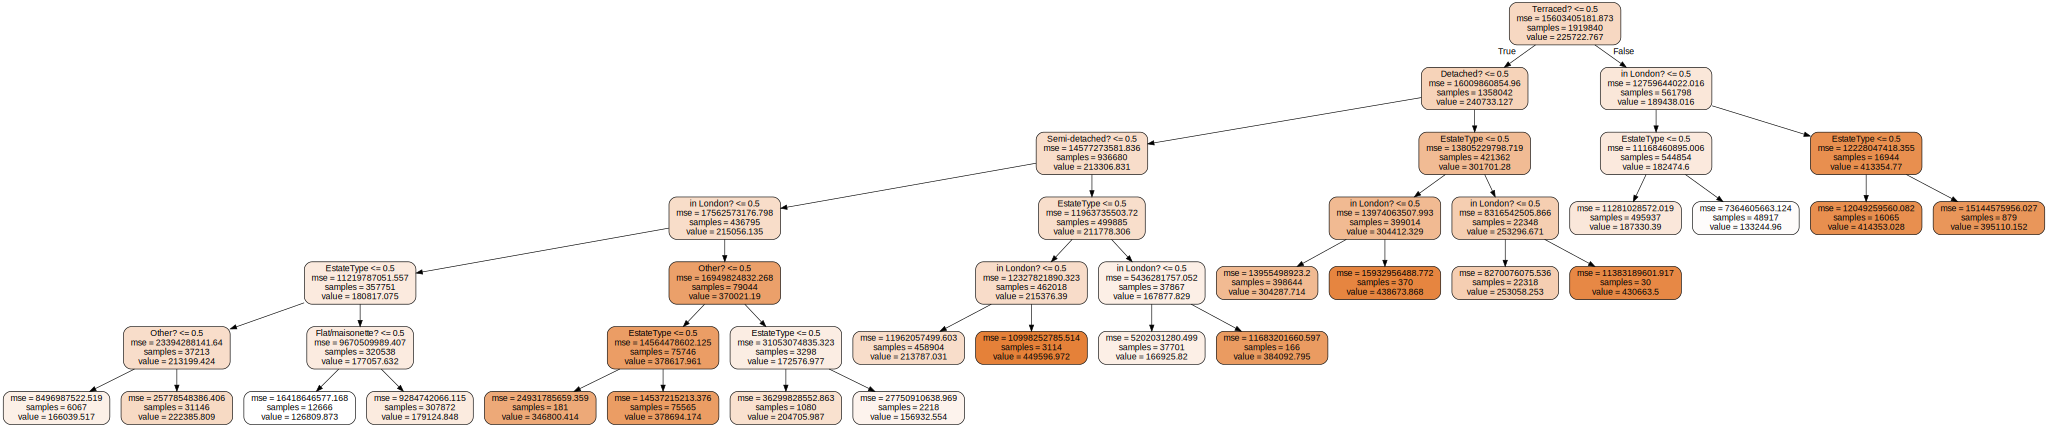

In [60]:
import graphviz
dot_data = tree.export_graphviz(final_model,
        feature_names= ["EstateType", "in London?", "Detached?", "Flat/maisonette?","Other?", "Semi-detached?", "Terraced?"],
        rounded=True,
        filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [61]:
graph.render("decision_tree_graphivz3")

'decision_tree_graphivz3.png'

In [59]:
text_representation = tree.export_text(final_model, feature_names= ["EstateType", "Location?", "Detached?", "Flat/maisonette?","Other?", "Semi-detached?", "terraced?"],)
print(text_representation)

|--- terraced? <= 0.50
|   |--- Detached? <= 0.50
|   |   |--- Semi-detached? <= 0.50
|   |   |   |--- Location? <= 0.50
|   |   |   |   |--- EstateType <= 0.50
|   |   |   |   |   |--- Other? <= 0.50
|   |   |   |   |   |   |--- value: [166039.52]
|   |   |   |   |   |--- Other? >  0.50
|   |   |   |   |   |   |--- value: [222385.81]
|   |   |   |   |--- EstateType >  0.50
|   |   |   |   |   |--- Flat/maisonette? <= 0.50
|   |   |   |   |   |   |--- value: [126809.87]
|   |   |   |   |   |--- Flat/maisonette? >  0.50
|   |   |   |   |   |   |--- value: [179124.85]
|   |   |   |--- Location? >  0.50
|   |   |   |   |--- Other? <= 0.50
|   |   |   |   |   |--- EstateType <= 0.50
|   |   |   |   |   |   |--- value: [346800.41]
|   |   |   |   |   |--- EstateType >  0.50
|   |   |   |   |   |   |--- value: [378694.17]
|   |   |   |   |--- Other? >  0.50
|   |   |   |   |   |--- EstateType <= 0.50
|   |   |   |   |   |   |--- value: [204705.99]
|   |   |   |   |   |--- EstateType >  0.50


## Try on test set

In [26]:
evaluate(final_model, x_test, y_test)

RMSE:  1822290.33093281 
 RMSE/Mean:  5.268013710381095 
 R2:  -0.0013274859506169356 
 (0.8*true_value, 1.2*true_value)%:  0.2708298680710024 
 (0.5*true_value, 1.5*true_value)%:  0.6392546796312115


There seem not be many predictions far deviating. However, the RMSE is extremely high, and the R sqare is abnormal even when a self defined R2 calculation function is used. 


In [27]:
#try self-defined R sqare calculation
def R2(true, pre):
    RSS = 0
    TSS = 0
    true_mean = true.mean()
    for i in range(len(true)):
        RSS += (pre[i] - true[i]) ** 2
        TSS += (true[i] - true_mean) ** 2
    return 1-RSS/TSS

R2(np.array(y_test['Price']), final_model.predict(x_test))

-0.0013274859499110558

The abnormality can be due to the extremes or outliers in test set. Thus, below, we tried to predict on test set with outliers droped. (The outliers are identified in the same way as they were in training data)

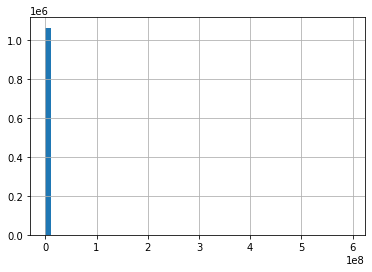

In [28]:
test['Price'].hist(bins = 50)
plt.show()

In [29]:
# get quartiles
Q1 = test['Price'].quantile(q = 0.25)
Q3 = test['Price'].quantile(q = 0.75)

# calculate lower and upper boundaries based on interquartile range
lower_bound = Q1 - 1.5*(Q3 - Q1)
upper_bound = Q3 + 1.5*(Q3 - Q1)

test = test.drop(test[(test['Price']>upper_bound)|(test['Price']<lower_bound)].index)

In [30]:
x_test = test.drop(columns=['Price','Time'])
y_test = test.filter(items=['Price'])

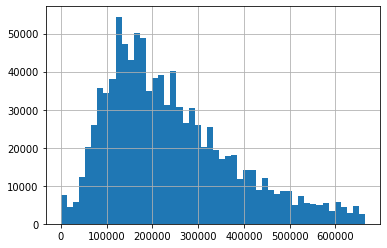

In [31]:
test['Price'].hist(bins = 50)
plt.show()

In [32]:
evaluate(final_model, x_test, y_test)

RMSE:  121659.35054348213 
 RMSE/Mean:  0.506478147165175 
 R2:  0.22241274935368405 
 (0.8*true_value, 1.2*true_value)%:  0.28957797029454263 
 (0.5*true_value, 1.5*true_value)%:  0.677929299323378
